<a href="https://colab.research.google.com/github/opasniyzapuper/mldl1/blob/main/%D0%9B%D0%90%D0%91_2_%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%A0%D0%BE%D0%B6%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', sep=',')

data.head(5)

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Произведем очистку данных как в прошлой работе

In [ ]:
data = data.drop(['oldpeak'], axis='columns')

Разделим датасет на тестовый и тренировочный

In [ ]:
X = data[data.columns[:-1]]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Построим график зависимости смертности от типа боли в груди

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


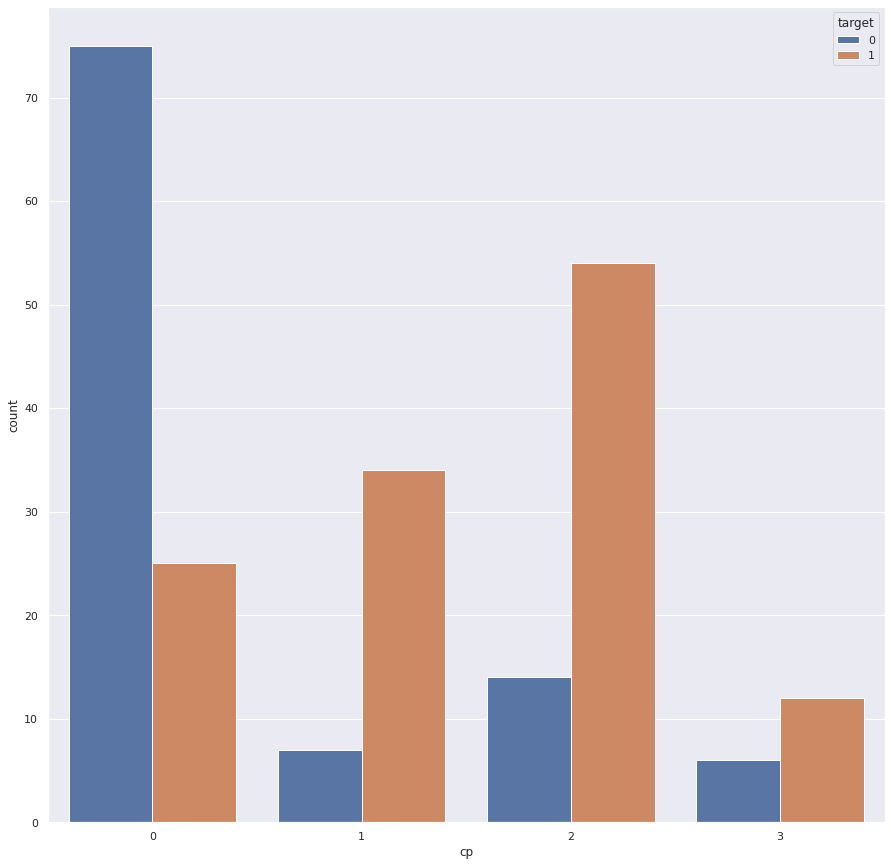

In [ ]:
sns.set(rc={'figure.figsize':(15, 15)})
sns.countplot(X_train['cp'], hue=y_train) # где "cp" это тип боли в груди, 0 - нет боли, 1 - 3 - различные боли в груди.

При втором типе боли в груди достинается наибольшая смертность

Построим график зависимости смертности от возраста

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


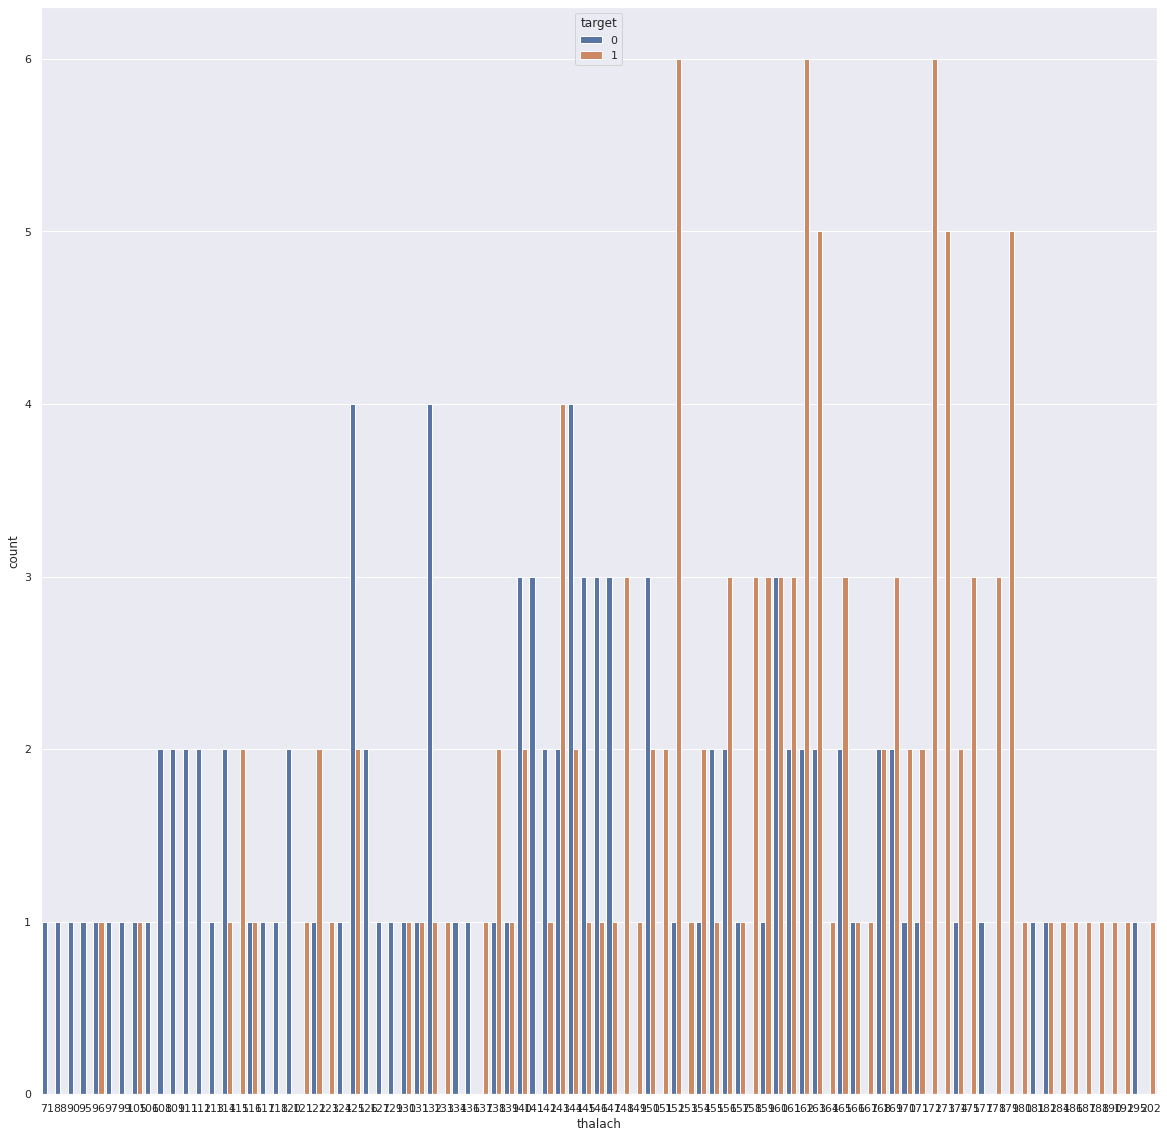

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.countplot(X_train['thalach'], hue=y_train)

Высокая частота сердечных сокращений говорит о возможном сердечном заболевании, что потдверждается графиком - частота сердечных сокращений прямопропорциональная смертности

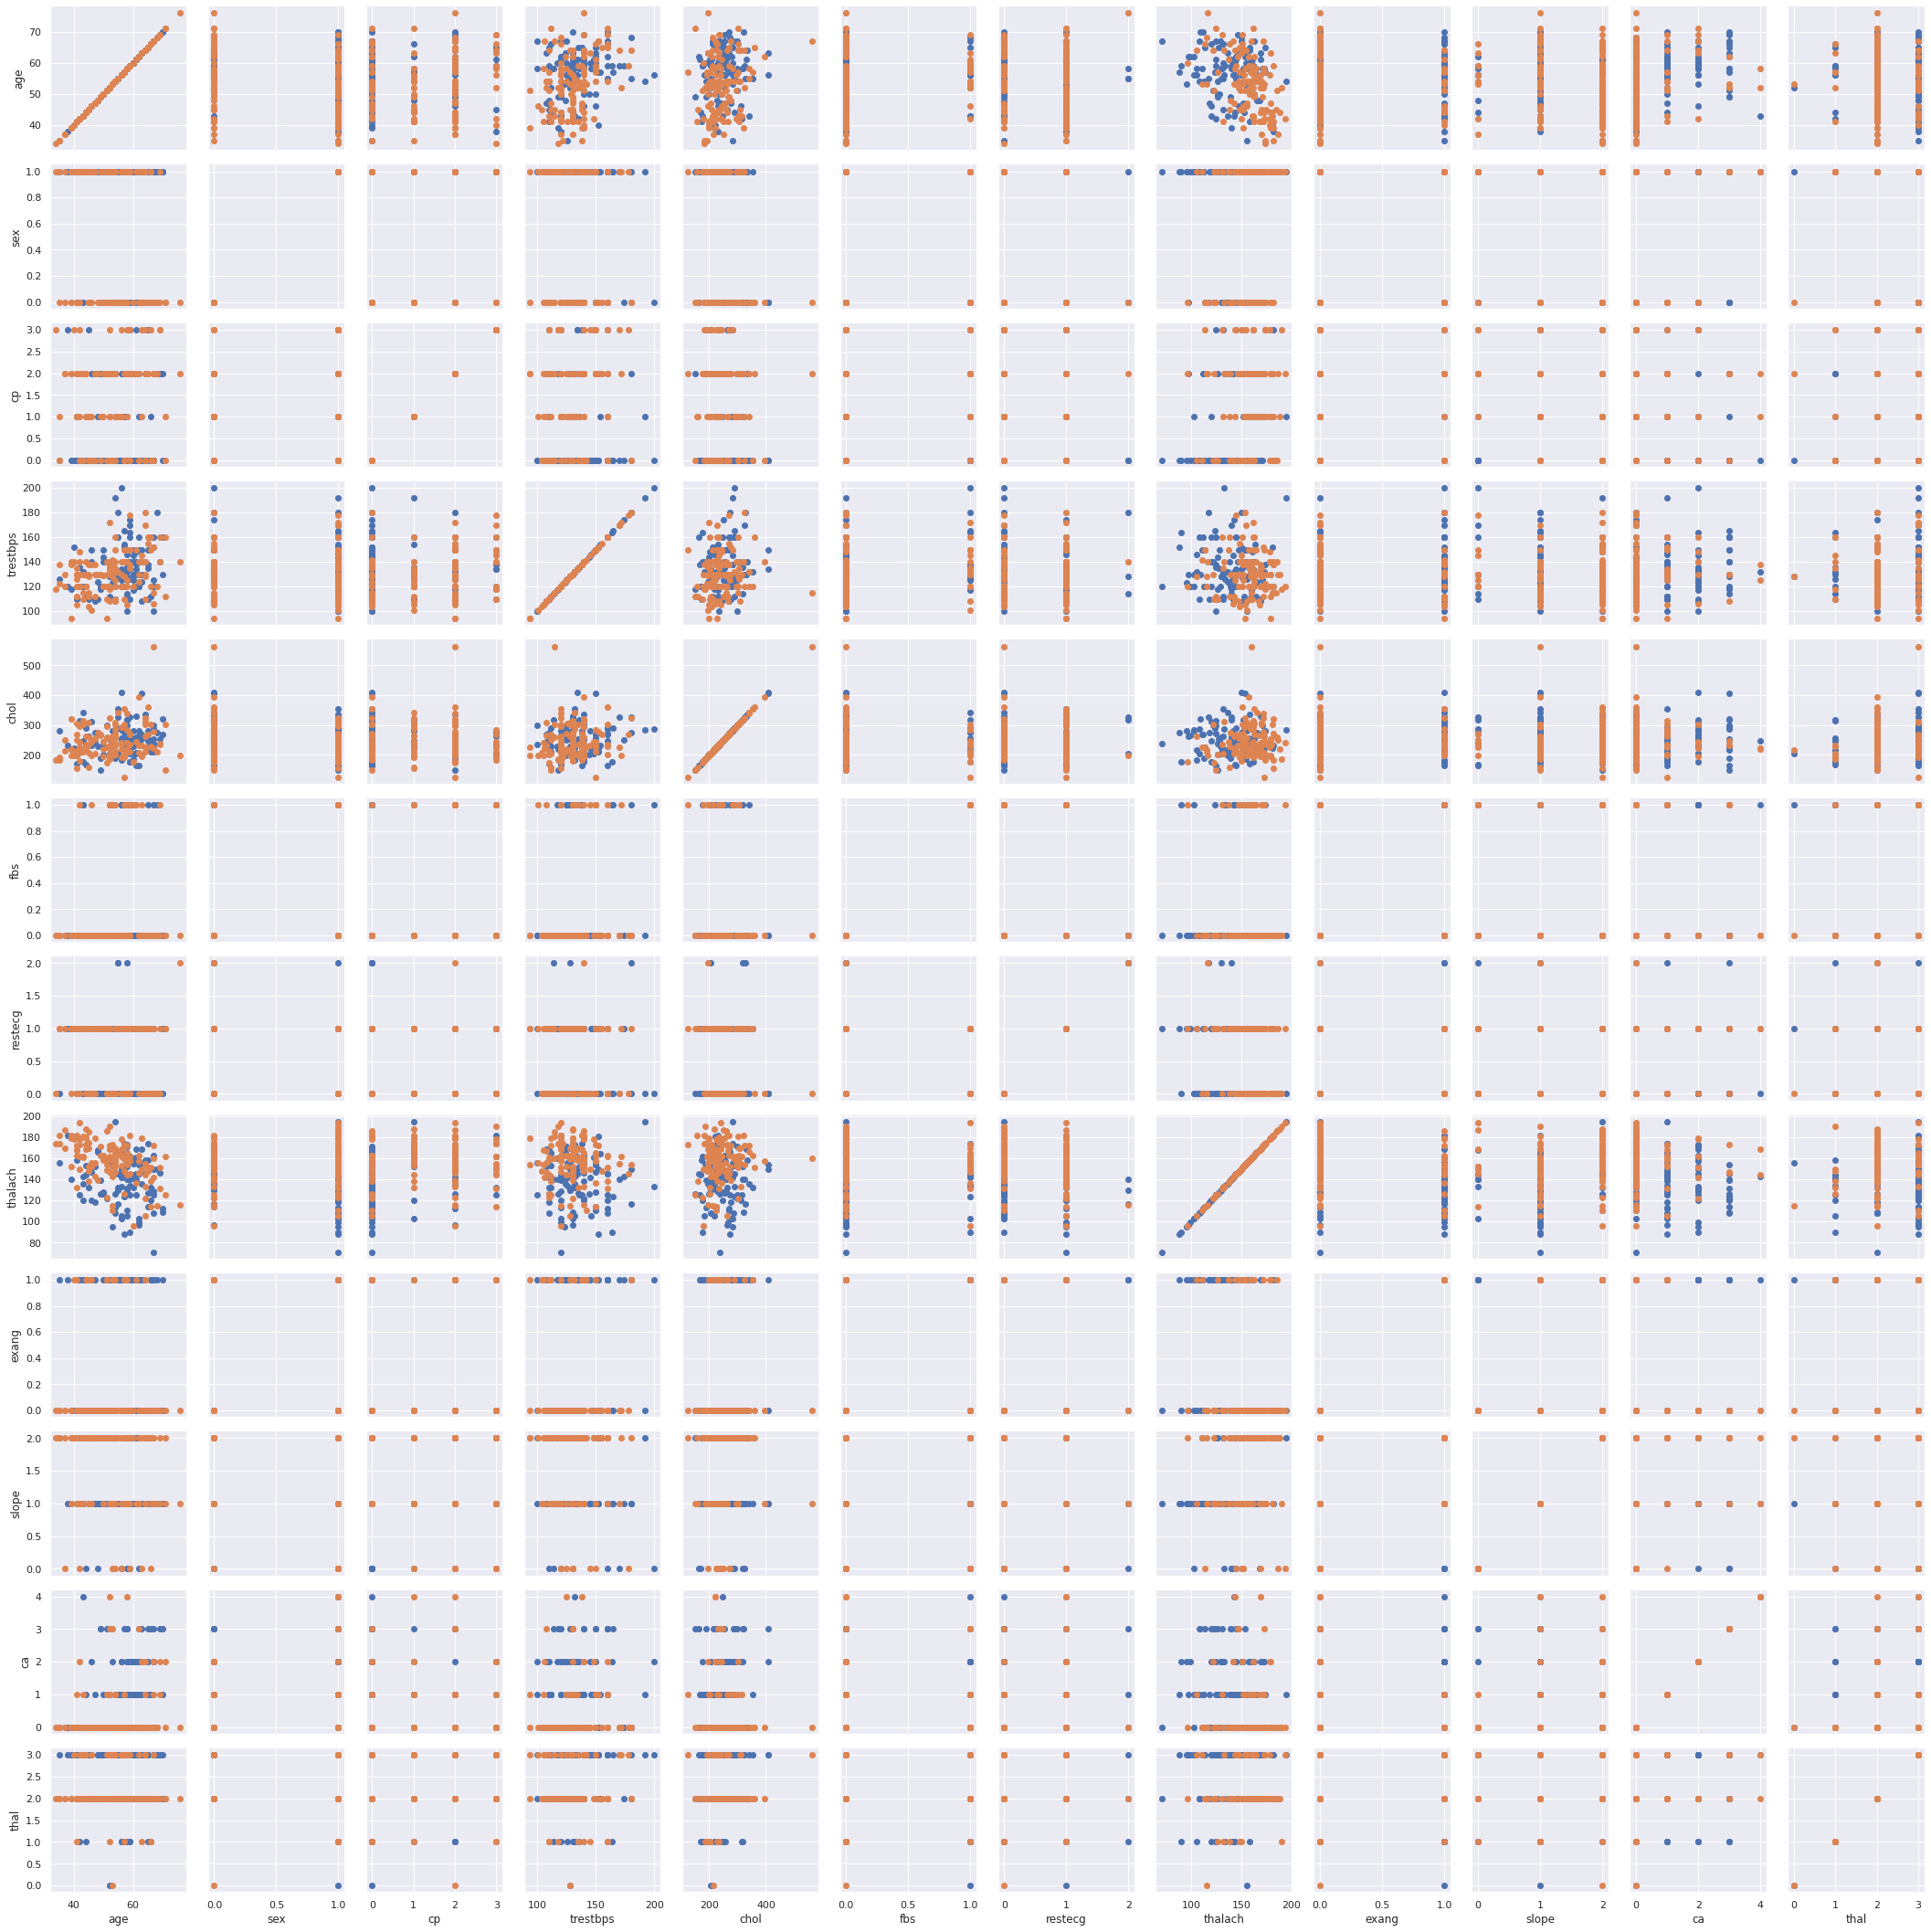

In [ ]:
df_for_pairgrid = X_train[['age', 'sex', 'cp', 'trestbps', 'chol',	'fbs',	'restecg',	'thalach',	'exang',	'slope',	'ca',	'thal']]
df_for_pairgrid['target'] = y_train

sns.PairGrid(df_for_pairgrid, hue='target').map(plt.scatter)

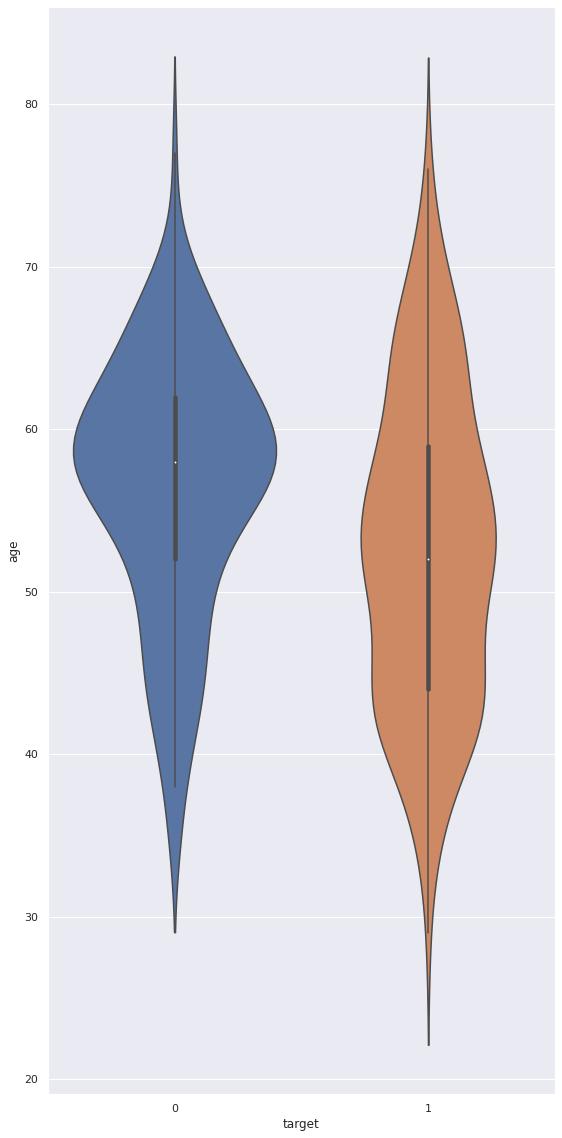

In [ ]:
plt.subplot(1, 2, 1)
sns.violinplot(x=y, y=data['age'])

Наибольший показатель смертности достинается в возрасте от 40 до 50 лет. Результат получился таким, в виду малого количества данных от людей, чей возраст младше 40 и страше 70.

Качество алгоритма до нормализации: 0.47368421052631576
Качество алгоритма после нормализации: 0.7631578947368421


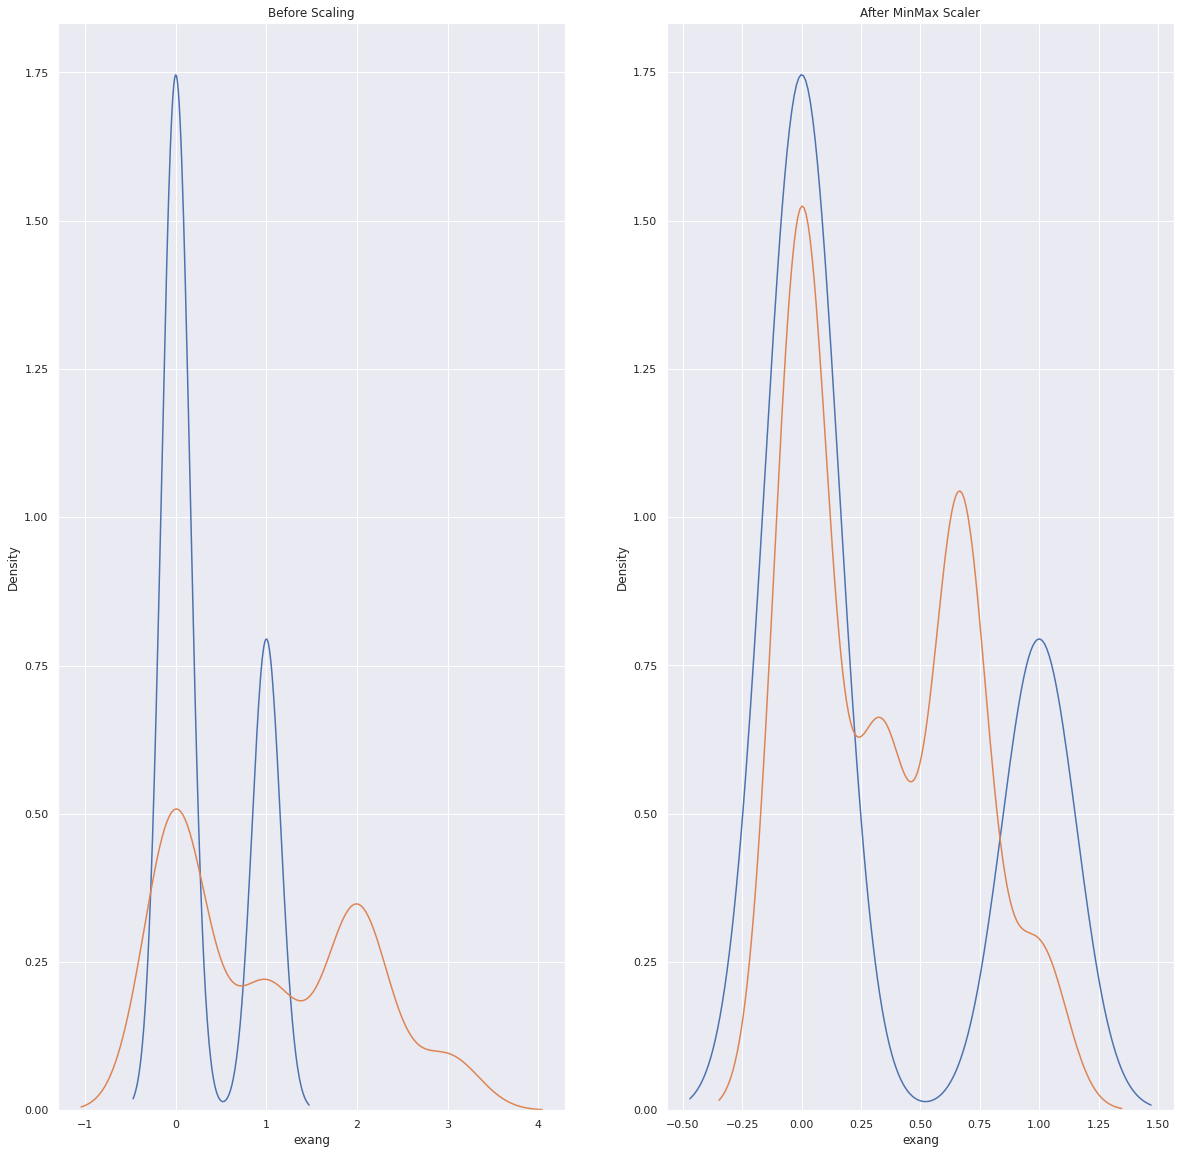

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['exang'], ax=ax1)
sns.kdeplot(X_train['cp'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['exang'], ax=ax2)
sns.kdeplot(X_train_scaled['cp'], ax=ax2)
plt.show()

Нормализуем данные и подберем алгоритм

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.7763157894736842
SGDClassifier 0.7763157894736842
SVC 0.8157894736842105
GaussianNB 0.7894736842105263
KNeighborsClassifier 0.7631578947368421


Лучше всего отработал алгоритм SVC

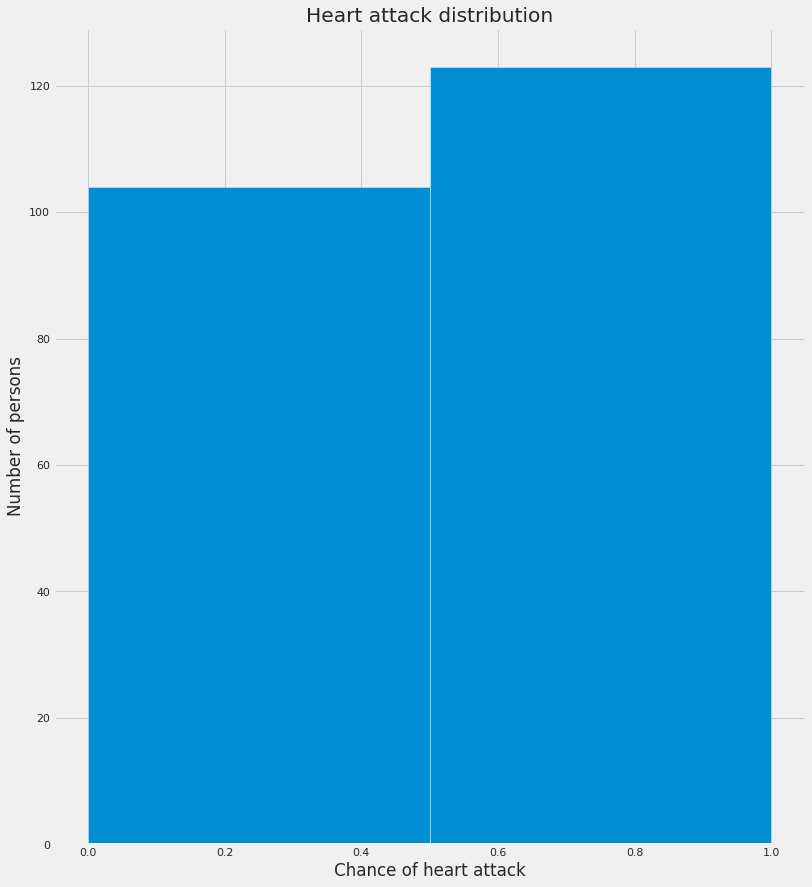

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel('Chance of heart attack'); plt.ylabel('Number of persons');
plt.title('Heart attack distribution');

В данном датасете людей, котрые умерли в рузультате болезни сердца больше

In [ ]:
from sklearn.metrics import accuracy_score

a = np.ones(y_test.shape[0]) # люди, которые умерли
accuracy_score(y_test, a)

0.5526315789473685

Точность совпадает с графиком

In [ ]:
X_train_scaled.reset_index(inplace=True, drop=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
heart_attack = X_train_scaled[y_train == 0]
X_train_strat = pd.concat([X_train_scaled, heart_attack, heart_attack], ignore_index=True)
y_train_strat = pd.concat([y_train, pd.Series(np.ones(X_train_strat.shape[0]-X_train_scaled.shape[0]))],
                          ignore_index=True)

In [ ]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_strat, y_train_strat).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.5526315789473685
SGDClassifier 0.5526315789473685
SVC 0.5526315789473685
GaussianNB 0.6447368421052632
KNeighborsClassifier 0.5526315789473685


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, 0.5))
print('F2:', fbeta_score(y_test, a, 2))

Accuracy: 0.5526315789473685
Precision: 0.5526315789473685
Recall: 1.0
ROC AUC: 0.5
PRC AUC: 0.7763157894736843
F1: 0.711864406779661
F0.5: 0.6069364161849712
F2: 0.8606557377049181
